## Read the train, validation and test datasets

In [2]:
import numpy as np
import pandas as pd

train_      = pd.read_csv('C:/Users/Shankeerthan/Desktop/DATA STORM 2021/updated data/train.csv')
validation_ = pd.read_csv('C:/Users/Shankeerthan/Desktop/DATA STORM 2021/updated data/validation.csv')
test       = pd.read_csv('C:/Users/Shankeerthan/Desktop/DATA STORM 2021/updated data/test.csv')

## Concatenate train and validation datasets

In [3]:
frames = [train_,validation_]
data = pd.concat(frames)

## Data preprocessing

In [4]:
Change_values = {'Gender':{'M':1, 'F':0},
                'Ethnicity':{'Latino':3,'African American':2,'Asian American':1, 'caucasian':0},
                'Educational_Level':{'Mid-School':0,'High-School':1,'College':2,'Grad':3},
                'Income':{'<25K':0,'25K --50K':1,'50K -- 100K':2,'>100K':3},
                'Country_region':{'North':3,'South':2,'East':1,'West':0},
                'Hotel_Type':{'City Hotel':2,'Airport Hotels':1,'Resort':0},
                'Meal_Type':{'BB':0,'HB':1,'FB':2},
                'Visted_Previously':{'Yes':1,'No':0},
                'Previous_Cancellations':{'Yes':1,'No':0},
                'Deposit_type':{'Refundable':2,'Non-Refundable':1, 'No Deposit':0},
                'Booking_channel':{'Direct':2,'Agent':1,'Online':0},
                'Required_Car_Parking':{'Yes':1,'No':0},
                'Reservation_Status':{'Check-In':2,'Canceled':1,'No-Show':0},
                'Use_Promotion':{'Yes':1,'No':0},
                }

data.replace(Change_values, inplace=True)
test.replace(Change_values, inplace=True)

data.pop('Expected_checkin')
data.pop('Expected_checkout')
data.pop('Booking_date')

test.pop('Expected_checkin')
test.pop('Expected_checkout')
test.pop('Booking_date')

index_d=data.pop('Reservation-id')
index_te=test.pop('Reservation-id')

## Data Cleaning

In [5]:
data.drop(data[data['Booked_before_checkin'] < 0].index, axis = 0, inplace = True)
data.drop(data[data['Booked_before_checkin'] > 365].index, axis = 0, inplace = True)
data.drop(data[data["Previous_Cancellations"] == 1].index, axis = 0, inplace = True)
data.drop(['Previous_Cancellations'], axis = 1, inplace = True)

test.drop(['Previous_Cancellations'], axis = 1, inplace = True)

label_d=data.pop('Reservation_Status')

## Oversampling for imbalanced Data

Class=2, n=19102 (33.333%)
Class=1, n=19102 (33.333%)
Class=0, n=19102 (33.333%)


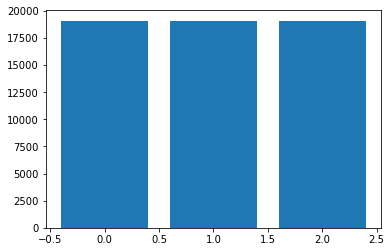

In [6]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

label_d = LabelEncoder().fit_transform(label_d)

oversample = SMOTE()
data,label_d = oversample.fit_resample(data, label_d)

counter = Counter(label_d)
for k,v in counter.items():
    per = v / len(label_d) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Split the data as train and validation

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train, validation, label_t, label_v = train_test_split( data, label_d, test_size = 0.38,random_state=100)

## Describe the train data

In [8]:
train.describe()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_days_spend,Booked_before_checkin
count,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000
mean,0.362014,43.643024,1.303780,1.398520,1.089701,1.418616,0.814574,2.130598,1.575248,0.228433,0.674266,0.145825,0.444088,0.567452,0.595570,0.710884,12.147485,174.649920,1.638380,110.066762
std,0.480590,14.963889,1.023182,0.944419,0.938000,0.949006,0.752995,1.045681,0.649534,0.473458,0.720968,0.352935,0.734005,0.775319,0.490788,0.453358,10.798521,43.754409,0.849452,67.380627
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,136.000000,1.000000,52.000000
50%,0.000000,44.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,175.000000,1.000000,107.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,20.000000,213.000000,2.000000,166.000000
max,1.000000,70.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,40.000000,250.000000,4.000000,365.000000


## Define functions for plots and prediction using xgboost model for multiclass classification

In [59]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['dval'][m]
        train_score = eval_results['dtrain'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model,epochs=1000):
    print('Fitting model...')
    sk_model.fit(train,label_t)
    print('Fitting done!')
    dtrain = xgb.DMatrix(train, label=label_t)
    dval = xgb.DMatrix(validation, label=label_v)
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(dval, 'dval'),(dtrain,'dtrain')]
    xgb_model = xgb.train(params, dtrain, epochs, evallist,evals_result=store,verbose_eval=100)
    
    print('-- Model Report --')
    print('XGBoost F1-Score (Macro): '+str(f1_score(sk_model.predict(validation),label_v,average='macro')))
    plot_compare(metrics,store,epochs)
    
    features = ['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously','Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'Expected_days_spend',
       'Booked_before_checkin']
    
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()

## Build xgboost model

In [61]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=3,
                    min_child_weight=5,
                    reg_alpha=100,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=3,
                    seed=27)

## Run the function for prediction and calculate f1 score for validation dataset

Fitting model...
Fitting done!
[0]	dval-mlogloss:1.09129	dval-merror:0.548698	dtrain-mlogloss:1.09135	dtrain-merror:0.55321
[100]	dval-mlogloss:0.916875	dval-merror:0.441521	dtrain-mlogloss:0.916712	dtrain-merror:0.43373
[200]	dval-mlogloss:0.882939	dval-merror:0.42577	dtrain-mlogloss:0.882085	dtrain-merror:0.416927
[300]	dval-mlogloss:0.868394	dval-merror:0.41925	dtrain-mlogloss:0.866966	dtrain-merror:0.406963
[400]	dval-mlogloss:0.861853	dval-merror:0.416219	dtrain-mlogloss:0.860188	dtrain-merror:0.403164
[500]	dval-mlogloss:0.857752	dval-merror:0.414887	dtrain-mlogloss:0.855967	dtrain-merror:0.40215
[600]	dval-mlogloss:0.855657	dval-merror:0.41351	dtrain-mlogloss:0.853735	dtrain-merror:0.400856
[700]	dval-mlogloss:0.854242	dval-merror:0.412821	dtrain-mlogloss:0.852153	dtrain-merror:0.400349
[800]	dval-mlogloss:0.853464	dval-merror:0.412729	dtrain-mlogloss:0.851298	dtrain-merror:0.399842
[900]	dval-mlogloss:0.852661	dval-merror:0.411581	dtrain-mlogloss:0.850361	dtrain-merror:0.399476

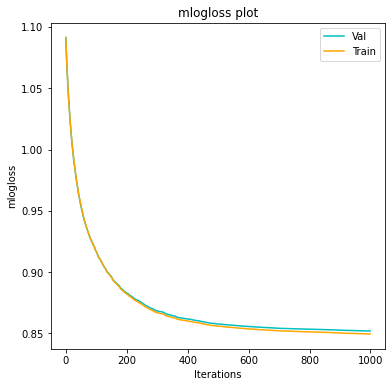

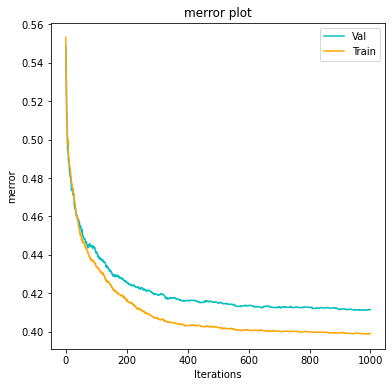

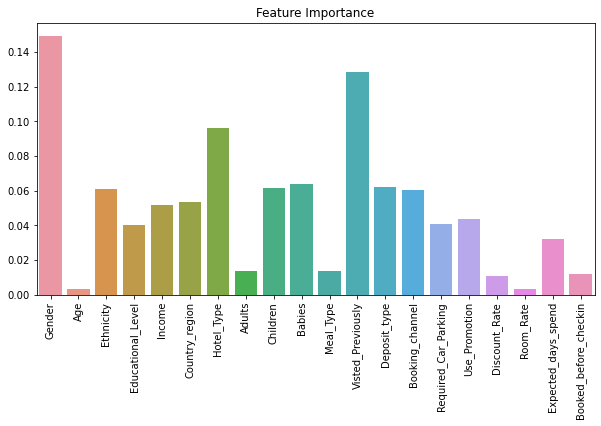

In [62]:
fitXgb(xgb1)

## Get predictions for test dataset

In [63]:
predict = xgb1.predict(test)

## Write predictions to csv

In [66]:
Reservation_Status=pd.DataFrame(predict,columns=['Reservation_Status'])
change_v = {'Reservation_Status':{2:1,1:2,0:3}}
Reservation_Status.replace(change_v, inplace=True)

submit = pd.read_csv('C:/Users/Shankeerthan/Desktop/Data Storm 2021/submit.csv')
submit=pd.concat([submit,Reservation_Status],axis=1)
export_csv=submit.to_csv('C:/Users/Shankeerthan/Desktop/Data Storm 2021/submit.csv',index=None)